In [43]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('online_classroom_data.csv', index_col=0, sep=',')
df.head()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1,0,0,0,0,6,0,1,1600,2.1,2.4,3.5,3.6,1.7,0
1,1,0,0,1,0,2,0,3,592,0.3,0.3,0.0,0.1,0.2,0
2,2,4,3,9,0,16,1,8,1110,8.0,5.0,5.0,7.0,5.0,1
3,5,1,3,9,2,11,0,8,8651,6.0,5.0,4.0,6.0,4.0,1
4,14,6,15,28,0,50,0,45,34172,8.7,9.0,6.5,10.0,8.8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_posts         71 non-null     int64  
 1   helpful_post        71 non-null     int64  
 2   nice_code_post      71 non-null     int64  
 3   collaborative_post  71 non-null     int64  
 4   confused_post       71 non-null     int64  
 5   creative_post       71 non-null     int64  
 6   bad_post            71 non-null     int64  
 7   amazing_post        71 non-null     int64  
 8   timeonline          71 non-null     int64  
 9   sk1_classroom       71 non-null     float64
 10  sk2_classroom       71 non-null     float64
 11  sk5_classroom       71 non-null     float64
 12  sk3_classroom       71 non-null     float64
 13  sk4_classroom       71 non-null     float64
 14  Approved            71 non-null     int64  
dtypes: float64(5), int64(10)
memory usage: 8.9 KB


In [5]:
df.shape

(71, 15)

In [6]:
len(df)

71

In [7]:
df.isnull().sum()

total_posts           0
helpful_post          0
nice_code_post        0
collaborative_post    0
confused_post         0
creative_post         0
bad_post              0
amazing_post          0
timeonline            0
sk1_classroom         0
sk2_classroom         0
sk5_classroom         0
sk3_classroom         0
sk4_classroom         0
Approved              0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_posts,71.0,5.507042,6.480461,0.0,2.00,4.0,7.5,46.0
helpful_post,71.0,4.028169,6.843082,0.0,0.00,3.0,5.5,53.0
nice_code_post,71.0,7.478873,12.746831,0.0,0.00,2.0,12.5,90.0
collaborative_post,71.0,11.366197,13.970622,0.0,1.50,7.0,16.0,89.0
confused_post,71.0,0.549296,1.350013,0.0,0.00,0.0,0.0,7.0
creative_post,71.0,18.309859,21.930795,0.0,6.50,14.0,24.0,150.0
bad_post,71.0,0.056338,0.287219,0.0,0.00,0.0,0.0,2.0
amazing_post,71.0,18.957746,22.086477,0.0,7.00,16.0,25.5,155.0
timeonline,71.0,10279.126761,10176.243372,0.0,1627.50,7664.0,16574.0,43612.0
sk1_classroom,71.0,5.246479,3.324190,0.0,2.15,6.0,8.0,10.0


In [9]:
#
var = ['timeonline','total_posts','helpful_post','nice_code_post','collaborative_post','creative_post','bad_post','sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom']
df[var].corr()

,timeonline,total_posts,helpful_post,nice_code_post,collaborative_post,creative_post,bad_post,sk1_classroom,sk2_classroom,sk3_classroom,sk4_classroom
timeonline,1.000000,0.698113,0.573440,0.605448,0.694439,0.690508,0.089735,0.634805,0.598068,0.634771,0.558211
total_posts,0.698113,1.000000,0.925181,0.907890,0.938350,0.960128,0.183985,0.564356,0.566671,0.515894,0.449873
helpful_post,0.573440,0.925181,1.000000,0.922716,0.897659,0.919296,0.188158,0.439232,0.436504,0.394106,0.341083
nice_code_post,0.605448,0.907890,0.922716,1.000000,0.873723,0.893558,0.164213,0.436876,0.442457,0.409675,0.337543
collaborative_post,0.694439,0.938350,0.897659,0.873723,1.000000,0.935743,0.215517,0.604051,0.599635,0.538386,0.461836
creative_post,0.690508,0.960128,0.919296,0.893558,0.935743,1.000000,0.242128,0.579853,0.572033,0.522333,0.450528
bad_post,0.089735,0.183985,0.188158,0.164213,0.215517,0.242128,1.000000,0.164798,0.115244,0.146791,0.021727
sk1_classroom,0.634805,0.564356,0.439232,0.436876,0.604051,0.579853,0.164798,1.000000,0.965278,0.946283,0.821142
sk2_classroom,0.598068,0.566671,0.436504,0.442457,0.599635,0.572033,0.115244,0.965278,1.000000,0.961807,0.828269
sk3_classroom,0.634771,0.515894,0.394106,0.409675,0.538386,0.522333,0.146791,0.946283,0.961807,1.000000,0.795503


### Análise Exploratória dos Dados

In [10]:
#Selecao de Features para encontrar qual a correlação entre as variáveis
features = ['timeonline','total_posts','helpful_post','nice_code_post','creative_post','bad_post','sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom']

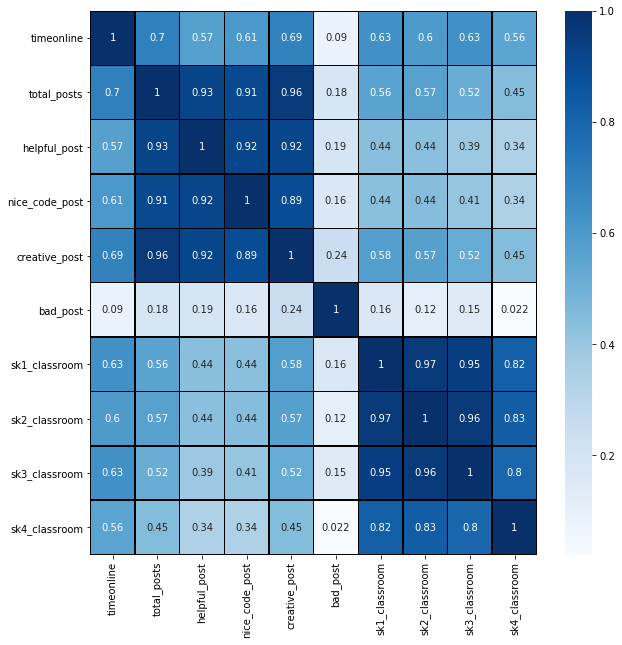

In [11]:
%matplotlib inline
#from matplotlib.pyplot import plt
#import matplotlib.pylot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df[features].corr(),annot=True,linewidths=0.5,linecolor='black',cmap='Blues')
plt.xticks(rotation=90)
plt.show()

In [27]:
#Selecao de Features para encontrar qual a correlação entre as variáveis
features = ['nice_code_post','confused_post','bad_post','timeonline','total_posts','helpful_post','sk4_classroom']

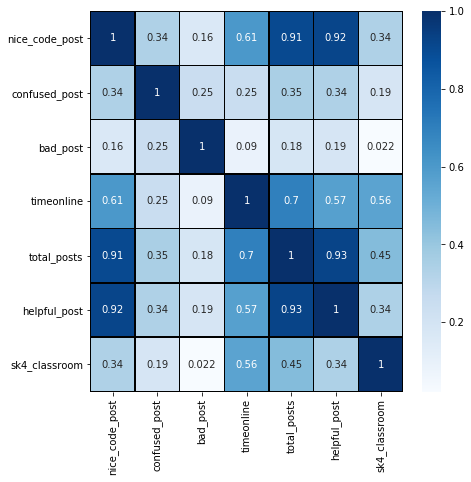

In [29]:
%matplotlib inline
#from matplotlib.pyplot import plt
#import matplotlib.pylot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df[features].corr(),annot=True,linewidths=0.5,linecolor='black',cmap='Blues')
plt.xticks(rotation=90)
plt.show()

NÃO: 21
SIM: 50
Proporção: 0.42 : 1


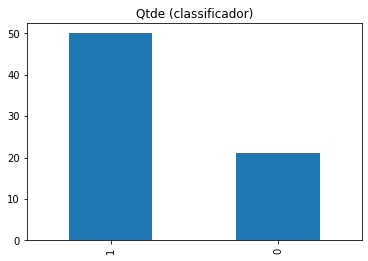

In [44]:
import matplotlib.pyplot as plt
atributo_classificador = df.Approved.value_counts()
print('NÃO:', atributo_classificador[0])
print('SIM:', atributo_classificador[1])

print('Proporção:', round(atributo_classificador[0]/atributo_classificador[1], 2), ': 1')
atributo_classificador.plot(kind='bar', title='Qtde (classificador)')

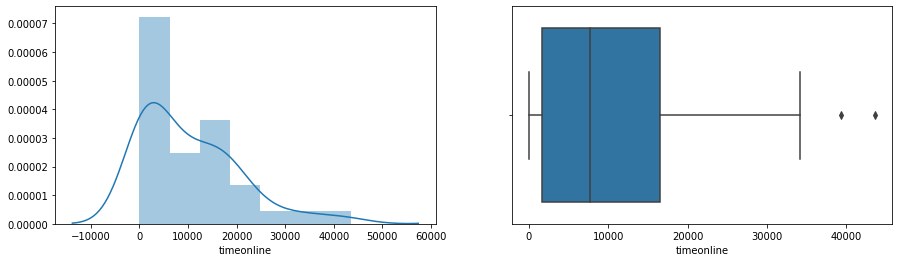

In [45]:
#Analise univariada do tempo online (em segundos).
f = plt.figure(figsize=(15,4))
f.add_subplot(1,2,1)
sns.distplot(df['timeonline'])
f.add_subplot(1,2,2)
sns.boxplot(df['timeonline'])

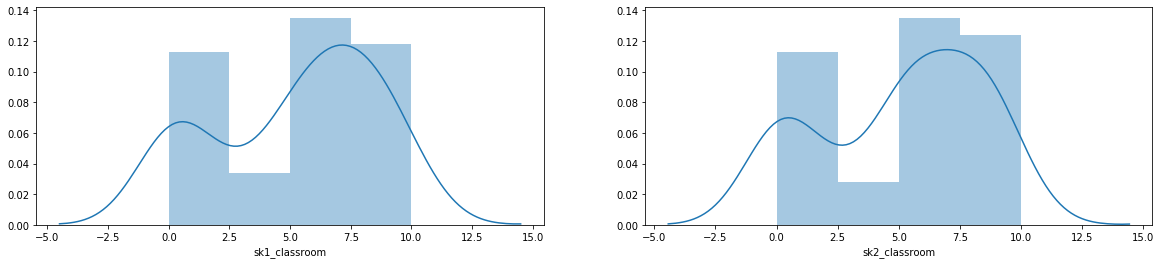

In [46]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['sk1_classroom'])

f.add_subplot(1,2,2)
sns.distplot(df['sk2_classroom'])

#f.add_subplot(1,2,3)
#sns.distplot(df['sk3_classroom'])

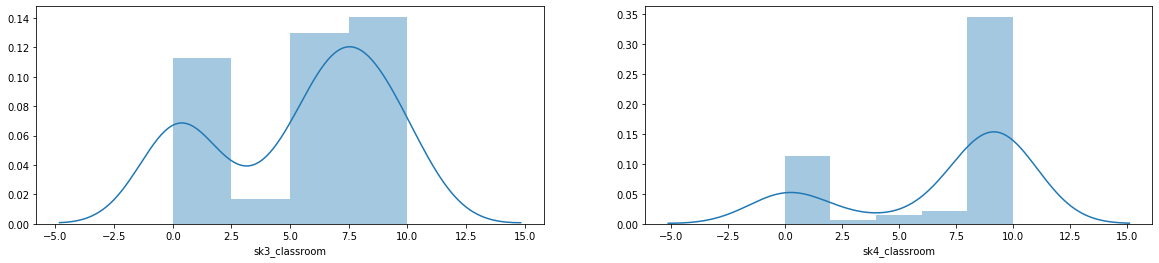

In [47]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['sk3_classroom'])

f.add_subplot(1,2,2)
sns.distplot(df['sk4_classroom'])


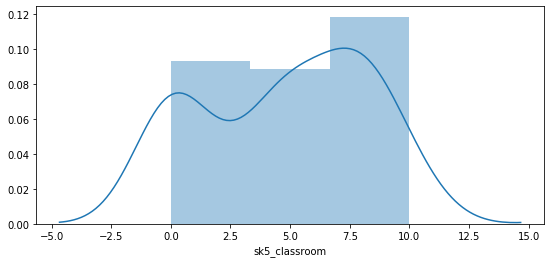

In [48]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['sk5_classroom'])

KeyError: 'approved'

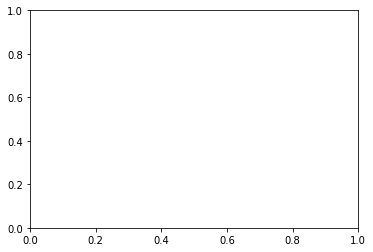

In [49]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
df['approved'].value_counts().plot('bar', color='red')
f.add_subplot(1,3,2)
df['approved'].value_counts().plot('bar', color='green')
f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

In [50]:
df.head()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1,0,0,0,0,6,0,1,1600,2.1,2.4,3.5,3.6,1.7,0
1,1,0,0,1,0,2,0,3,592,0.3,0.3,0.0,0.1,0.2,0
2,2,4,3,9,0,16,1,8,1110,8.0,5.0,5.0,7.0,5.0,1
3,5,1,3,9,2,11,0,8,8651,6.0,5.0,4.0,6.0,4.0,1
4,14,6,15,28,0,50,0,45,34172,8.7,9.0,6.5,10.0,8.8,1


In [17]:
#KNNNNNNNNNNNNNNNNNNNNN

In [56]:
labels = df.columns[:-1]
X = df[labels]
y = df['Approved']

In [57]:
#Separação de 70% dos Dados para treino e 30% para teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

In [58]:
#Criação de KNN com K=4;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [59]:
#Treinamento do modelo KNN;
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [60]:
resultado = knn.predict(X_test)

In [61]:
#Verificação de Acurácia e Overfiting
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.91      0.89        23

    accuracy                           0.83        29
   macro avg       0.74      0.71      0.72        29
weighted avg       0.82      0.83      0.82        29



In [62]:
#Verificação de Acurácia e Overfiting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, df.drop('timeonline',axis=1),df['Approved'], cv=5)
scores

array([0.93333333, 0.92857143, 0.92857143, 1.        , 1.        ])

Automatically created module for IPython interactive environment


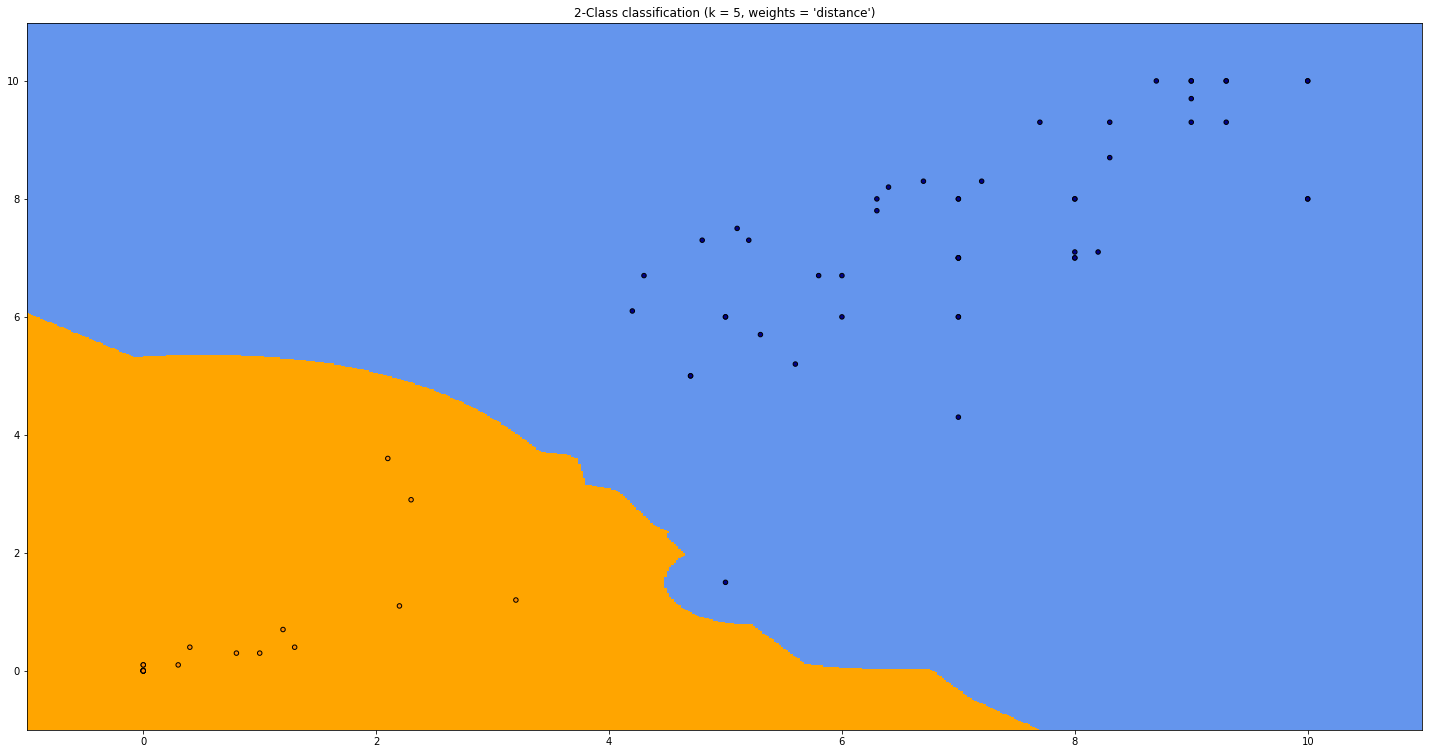

In [63]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset

X = df[['sk1_classroom','sk3_classroom']].values
#y = le.fit_transform(ds['Approved'])
y = df['Approved']
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(25,13))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [83]:
#Procurando o valor da correlação entre os recursos.
df.corr().style.background_gradient().set_precision(2)

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
total_posts,1.00,0.93,0.91,0.94,0.35,0.96,0.18,0.95,0.70,0.56,0.57,0.44,0.52,0.45,0.44
helpful_post,0.93,1.00,0.92,0.90,0.34,0.92,0.19,0.89,0.57,0.44,0.44,0.30,0.39,0.34,0.33
nice_code_post,0.91,0.92,1.00,0.87,0.34,0.89,0.16,0.86,0.61,0.44,0.44,0.33,0.41,0.34,0.35
collaborative_post,0.94,0.90,0.87,1.00,0.34,0.94,0.22,0.93,0.69,0.60,0.60,0.49,0.54,0.46,0.47
confused_post,0.35,0.34,0.34,0.34,1.00,0.29,0.25,0.22,0.25,0.19,0.21,0.12,0.28,0.19,0.27
creative_post,0.96,0.92,0.89,0.94,0.29,1.00,0.24,0.95,0.69,0.58,0.57,0.45,0.52,0.45,0.44
bad_post,0.18,0.19,0.16,0.22,0.25,0.24,1.00,0.13,0.09,0.16,0.12,0.11,0.15,0.02,0.13
amazing_post,0.95,0.89,0.86,0.93,0.22,0.95,0.13,1.00,0.69,0.57,0.57,0.47,0.51,0.47,0.43
timeonline,0.70,0.57,0.61,0.69,0.25,0.69,0.09,0.69,1.00,0.63,0.60,0.52,0.63,0.56,0.57
sk1_classroom,0.56,0.44,0.44,0.60,0.19,0.58,0.16,0.57,0.63,1.00,0.97,0.91,0.95,0.82,0.89


In [78]:
#Listando os hiperparâmetros que queremos tunar
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [79]:
#Converter em dicionário
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [80]:
#Criar novo objeto KNN
knn_2 = KNeighborsClassifier()

In [81]:
#Usando o GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [82]:
#Ajuste do modelo
best_model = clf.fit(x,y)

NameError: name 'x' is not defined

In [77]:
#Print The value of best Hyperparameters
print('Melhor leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Melhor p:', best_model.best_estimator_.get_params()['p'])
print('Melhor n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'best_model' is not defined